# Template

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch

pd.set_option("precision", 2)
torch.set_printoptions(precision=2, sci_mode=False)

%precision 2
%load_ext lab_black
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Start

In [2]:
# begin project ...

## Time

In [3]:
# unix epoch time - number of seconds since 1970
import time

time.time()

1603177643.34

In [4]:
# years since 1970
2021 - 1970

51

In [5]:
# do the math
t = 60 * 60 * 24 * 365 * 51
t

1608336000

## DateTime

In [6]:
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
from datetime import tzinfo
from datetime import timezone

In [7]:
today = date.today()

print("-" * 25)
print("today is {}".format(today))
print("today is {} {} {}".format(today.month, today.day, today.year))
days = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
print("today's weekday is {}".format(days[today.weekday()]))

-------------------------
today is 2020-10-20
today is 10 20 2020
today's weekday is tuesday


In [8]:
print("-" * 25)
today = datetime.now()
print("Today is {}".format(today))
print(
    "Today is the month {} and day {} of the year {}".format(
        today.month, today.day, today.year
    )
)
print("Time from datetime", datetime.time(today))
print(
    "Specify date and time in UTC time ", datetime(2020, 3, 14, 12, tzinfo=timezone.utc)
)

-------------------------
Today is 2020-10-20 00:07:23.528461
Today is the month 10 and day 20 of the year 2020
Time from datetime 00:07:23.528461
Specify date and time in UTC time  2020-03-14 12:00:00+00:00


In [9]:
print("-" * 25)
today = datetime.now()
print("year:", today.strftime("%Y"))
print("year:", today.strftime("%y"))
print("month:", today.strftime("%B"))
print("day:", today.strftime("%d"))
print("weekday:", today.strftime("%a"))
print("date:", today.strftime("%x"))
print("time:", today.strftime("%X"))
print("timedate:", today.strftime("%Y-%m-%d %H:%M:%S"))

-------------------------
year: 2020
year: 20
month: October
day: 20
weekday: Tue
date: 10/20/20
time: 00:07:23
timedate: 2020-10-20 00:07:23


## Deltas

In [10]:
print(
    "One year from now it will be: ", (today + timedelta(days=365)).strftime("%Y-%m-%d")
)
print(
    "40 days from now it will be: ", (today + timedelta(days=40)).strftime("%Y-%m-%d")
)
print(
    "10 weeks and 2 days from now it will be:",
    (today + timedelta(weeks=10, days=2)).strftime("%Y-%m-%d"),
)

One year from now it will be:  2021-10-20
40 days from now it will be:  2020-11-29
10 weeks and 2 days from now it will be: 2020-12-31


## Pandas

In [11]:
# standard - month first
df = pd.DataFrame({"date": ["3/10/2000", "3/11/2000", "3/12/2000"], "value": [2, 3, 4]})
df["date"] = pd.to_datetime(df["date"])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


- By default, to_datetime() will parse string with month first (MM/DD, MM DD, or MM-DD) format, and this arrangement is relatively unique in the United States.
- In most of the rest of the world, the day is written first (DD/MM, DD MM, or DD-MM). If you would like Pandas to consider day first instead of month, you can set the argument dayfirst to True.

In [12]:
# standard - day first
df = pd.DataFrame({"date": ["3/10/2000", "3/11/2000", "3/12/2000"], "value": [2, 3, 4]})
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


In [13]:
# custom parsing
df = pd.DataFrame(
    {
        "date": ["2016-6-10 20:30:0", "2016-7-1 19:45:30", "2013-10-12 4:5:1"],
        "value": [2, 3, 4],
    }
)
df["date"] = pd.to_datetime(df["date"], format="%Y-%d-%m %H:%M:%S")
df

,date,value
0,2016-10-06 20:30:00,2
1,2016-01-07 19:45:30,3
2,2013-12-10 04:05:01,4


In [14]:
# errors
try:
    df = pd.DataFrame(
        {"date": ["3/10/2000", "a/11/2000", "3/12/2000"], "value": [2, 3, 4]}
    )
    df["date"] = pd.to_datetime(df["date"])
except:
    print("error")

error


In [15]:
# ignore error
df["date"] = pd.to_datetime(df["date"], errors="ignore")
df

,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [16]:
# coerce to Not a Time
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


In [17]:
# isna - found missing dates
df.date.isna().any()

True

In [18]:
# get the parts of the date
df = pd.DataFrame(
    {
        "name": ["Tom", "Andy", "Lucas"],
        "DoB": ["08-05-1997", "04-28-1996", "12-16-1995"],
    }
)
df["DoB"] = pd.to_datetime(df["DoB"])
df["year"] = df["DoB"].dt.year
df["month"] = df["DoB"].dt.month
df["day"] = df["DoB"].dt.day
df["is_leap_year"] = df["DoB"].dt.is_leap_year
df

,name,DoB,year,month,day,is_leap_year
0,Tom,1997-08-05,1997,8,5,False
1,Andy,1996-04-28,1996,4,28,True
2,Lucas,1995-12-16,1995,12,16,False


In [19]:
iso = df.DoB.dt.isocalendar()
iso

,year,week,day
0,1997,32,2
1,1996,17,7
2,1995,50,6


In [20]:
df = pd.concat([df, iso], axis=1)
df

,name,DoB,year,month,day,is_leap_year,year,week,day
0,Tom,1997-08-05,1997,8,5,False,1997,32,2
1,Andy,1996-04-28,1996,4,28,True,1996,17,7
2,Lucas,1995-12-16,1995,12,16,False,1995,50,6


In [21]:
dw_mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}
", ".join(df.DoB.dt.weekday.map(dw_mapping).values.tolist())

'Tuesday, Sunday, Saturday'

In [22]:
today = pd.to_datetime("today")
df["age"] = today.year - df["DoB"].dt.year
df

,name,DoB,year,month,day,is_leap_year,year,week,day,age
0,Tom,1997-08-05,1997,8,5,False,1997,32,2,23
1,Andy,1996-04-28,1996,4,28,True,1996,17,7,24
2,Lucas,1995-12-16,1995,12,16,False,1995,50,6,25


## City Sales

In [23]:
# https://github.com/BindiChen/machine-learning/tree/master/data-analysis/008-pandas-datetime/data
city = pd.read_csv("city_sales.csv", parse_dates=["date"], index_col="date")
city.head(2)

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London


In [24]:
city.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1795144 entries, 2015-01-01 09:00:00 to 2019-01-31 16:00:00
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   num     int64 
 1   city    object
dtypes: int64(1), object(1)
memory usage: 41.1+ MB


In [25]:
# number of records in 2018
city.loc["2018"].shape[0]

439524

In [26]:
# total sales in 2018
city.loc["2018", "num"].sum()

1231190

In [27]:
# sales by city in 2018
city.loc["2018"].groupby("city").sum()

,num
city,
Cambridge,308428
Durham,307965
London,307431
Oxford,307366


In [28]:
# average sales in May 2018
city.loc["2018-5", "num"].mean()

2.7938397190953217

In [29]:
# how many transactions occurred on May 1, 2018
city.loc["2018-5-1"].shape

(1684, 2)

In [30]:
# total sales 2016, 2017, 2018
city.loc["2016":"2018", "num"].sum()

3690132

In [31]:
# sales on May 2, 2018 between 10:30 and 10:45
city.loc["2018-5-2 10:30":"2018-5-2 10:45", "num"].sum()

179

In [32]:
# create a rolling sum
city["rolling_sum"] = city.rolling(3).sum()
city.head()

,num,city,rolling_sum
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,11.0
2015-01-01 09:03:00,3,London,10.0
2015-01-01 09:04:00,3,London,9.0


In [33]:
# backfill missing values
city["rolling_sum_backfilled"] = city["rolling_sum"].fillna(method="backfill")
city.head()

,num,city,rolling_sum,rolling_sum_backfilled
date,,,,
2015-01-01 09:00:00,4,London,NaN,11.0
2015-01-01 09:01:00,4,London,NaN,11.0
2015-01-01 09:02:00,3,London,11.0,11.0
2015-01-01 09:03:00,3,London,10.0,10.0
2015-01-01 09:04:00,3,London,9.0,9.0


In [34]:
# get less data ... too slow
sm = city.head(250_000)

In [35]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
# resample to monthly figures
# resample is like "groupby", but for datetime
monthly = sm.resample("M")[["num"]].sum()
monthly.head()

,num
date,
2015-01-31,25974
2015-02-28,23571
2015-03-31,25862
2015-04-30,25964
2015-05-31,24773


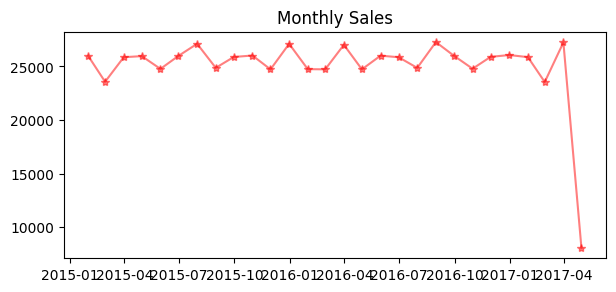

In [36]:
fig = plt.figure(figsize=(7, 3), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(monthly.index, monthly.num, color="red", marker="*", alpha=0.5)
_ = ax.set_title("Monthly Sales")

In [37]:
# quarterly statistics
sm.resample("Q")[["num"]].agg(["sum", "mean", "std"])

num            
              sum  mean   std
date                         
2015-03-31  75407  2.80  0.87
2015-06-30  76724  2.80  0.87
2015-09-30  77871  2.80  0.87
2015-12-31  77861  2.80  0.87
2016-03-31  76498  2.80  0.87
2016-06-30  76600  2.80  0.88
2016-09-30  78143  2.81  0.87
2016-12-31  76752  2.80  0.87
2017-03-31  76659  2.80  0.87
2017-06-30   8053  2.80  0.86

In [38]:
# normal data
sm.num.head(5)

date
2015-01-01 09:00:00    4
2015-01-01 09:01:00    4
2015-01-01 09:02:00    3
2015-01-01 09:03:00    3
2015-01-01 09:04:00    3
Name: num, dtype: int64

In [39]:
# shifted forward by 1 day
sm.num.shift(1).head(5)

date
2015-01-01 09:00:00    NaN
2015-01-01 09:01:00    4.0
2015-01-01 09:02:00    4.0
2015-01-01 09:03:00    3.0
2015-01-01 09:04:00    3.0
Name: num, dtype: float64

In [40]:
# lag by 1 day
sm.num.shift(-1).head(5)

date
2015-01-01 09:00:00    4.0
2015-01-01 09:01:00    3.0
2015-01-01 09:02:00    3.0
2015-01-01 09:03:00    3.0
2015-01-01 09:04:00    3.0
Name: num, dtype: float64

## Tesla

In [41]:
# https://finance.yahoo.com/quote/TSLA/history?p=TSLA
# pip install fbprophet

In [42]:
tesla = pd.read_csv("TSLA.csv", parse_dates=["Date"])
tesla.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-21,51.67,51.90,50.04,50.70,50.70,25101500
1,2019-10-22,50.86,51.67,50.17,51.12,51.12,23004000
2,2019-10-23,50.90,51.23,50.27,50.94,50.94,26305500


In [44]:
from fbprophet import Prophet

In [46]:
tesla = tesla[["Date", "Close"]]
tesla.columns = ["ds", "y"]
tesla.head(3)

,ds,y
0,2019-10-21,50.70
1,2019-10-22,51.12
2,2019-10-23,50.94


In [47]:
m = Prophet()

In [48]:
m.fit(tesla)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
612,2021-10-15
613,2021-10-16
614,2021-10-17
615,2021-10-18
616,2021-10-19


In [50]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
612,2021-10-15,1237.17,1072.59,1415.89
613,2021-10-16,1239.57,1085.12,1414.44
614,2021-10-17,1241.68,1086.96,1417.02
615,2021-10-18,1245.18,1084.21,1418.62
616,2021-10-19,1246.90,1090.05,1423.06


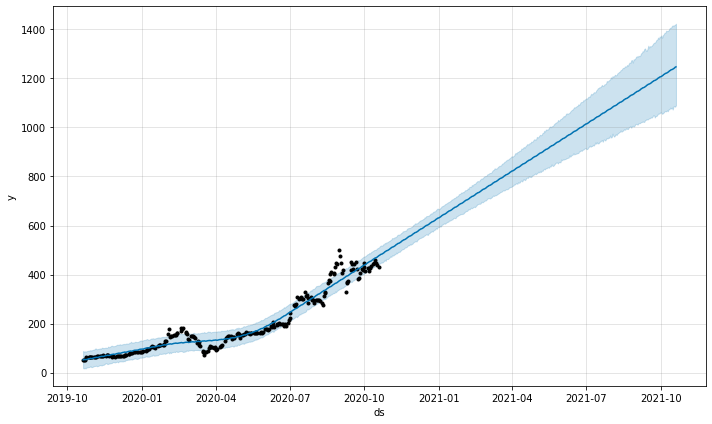

In [51]:
fig1 = m.plot(forecast)

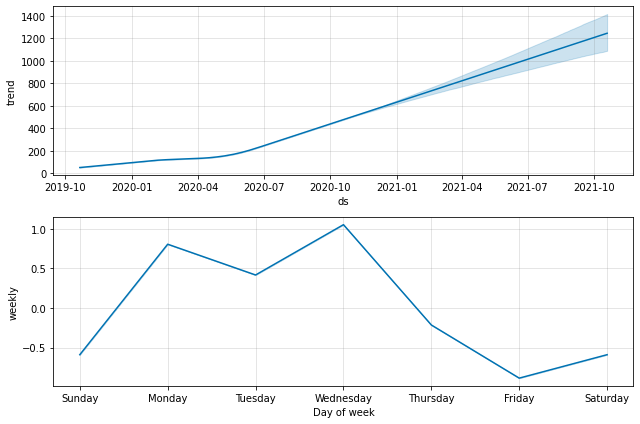

In [52]:
fig2 = m.plot_components(forecast)